<a href="https://colab.research.google.com/github/highway92/machine_learning/blob/main/year_dream/do/n_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install neuralprophet

     |████████████████████████████████| 67 kB 872 kB/s  eta 0:00:01
     |████████████████████████████████| 121 kB 33.1 MB/s eta 0:00:01
     |████████████████████████████████| 243 kB 43.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 19.7 MB/s eta 0:00:01


In [ ]:
# 라이브러리 임포트
import os
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
from torch import autograd
from torch.utils import data
from torch.optim import Adam
from torchvision import datasets, transforms
import torchvision.models as models
from datetime import datetime

from fbprophet import Prophet
from neuralprophet import NeuralProphet

In [ ]:
# 난수 생성기가 항상 일정한 값을 출력하게 하기 위해 seed 고정
random_seed = 2021
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
np.random.seed(random_seed)

## EDA

In [ ]:
DATASET_PATH = os.path.join('/USER/abj/week2_traffic/data')

In [ ]:
train = pd.read_csv(os.path.join(DATASET_PATH, 'train.csv'))

In [ ]:
valid = pd.read_csv(os.path.join(DATASET_PATH, 'validate.csv'))

In [ ]:
test = pd.read_csv(os.path.join(DATASET_PATH, 'test.csv'))

In [ ]:
train['날짜'].value_counts()

In [ ]:
len(train.columns)

In [ ]:
train['날짜']

In [ ]:
def day_plus_hour(df):
    date = df['날짜']
    hour = df['시간']
    for i in range(len(date)):
        d = str(date[i])
        d = d[:4] + '-'+d[4:6] + '-' + d[6:]
        if hour[i] < 10:
            d += (' 0' + str(hour[i]) + ':00:00')
        else:
            d += (' ' + str(hour[i]) + ':00:00')
        date[i] = d
    df['날짜'] = pd.to_datetime(df['날짜'])
    return df

In [ ]:
train = day_plus_hour(train)
train

In [ ]:
print(type(train['날짜'][0]))

In [ ]:
train_0229 = train[train['날짜']<='2020-02-29 12:00:00']

In [ ]:
train_0229

In [ ]:
test_0229 = pd.date_range(start = '2020-02-29 13:00:00',
                     end = '2020-02-29 23:00:00',     
                     freq = 'H',          
                     )
test_0229 = pd.DataFrame(test_0229, columns=['ds'])
test_0229

,ds
0,2020-02-29 13:00:00
1,2020-02-29 14:00:00
2,2020-02-29 15:00:00
3,2020-02-29 16:00:00
4,2020-02-29 17:00:00
5,2020-02-29 18:00:00
6,2020-02-29 19:00:00
7,2020-02-29 20:00:00
8,2020-02-29 21:00:00
9,2020-02-29 22:00:00


In [ ]:
def prop(df, test_df):
    m = Prophet(daily_seasonality=True, weekly_seasonality=20)
    m.add_country_holidays(country_name='KR')
    # m.add_country_holidays(country_name='KR')
    m.fit(df)
    pred = m.predict(test_df)
    
    return pred

In [ ]:
def n_prop(df, test_df):
    m = NeuralProphet(daily_seasonality=True, freq='H')
    m.add_country_holidays(country_name='KR')
    # m.add_country_holidays(country_name='KR')
    m.fit(df)
    pred = m.predict(test_df)
    
    return pred

In [ ]:
NeuralProphet

In [ ]:
col = train.columns[2:].tolist()

In [ ]:
result_0229  = test_0229[:]

In [ ]:
for c in col:
    train_0229_sliced = train_0229[['날짜',c]]
    train_0229_sliced.columns = ['ds', 'y']
    pred = prop(train_0229_sliced, test_0229)
    result_0229 = pd.concat([result_0229, pred['yhat']], axis=1)
    # prop(df[''])

In [ ]:
train_0229_drophour = train_0229.drop(['시간'], axis=1, inplace=False)
new_col = train_0229_drophour.columns
result_0229.columns = new_col
result_0229

In [ ]:
print(train_0229.columns)
print(result_0229.columns)

In [ ]:
train_after_0229 = train[train['날짜']>='2020-03-01 00:00:00']
train_after_0229

In [ ]:
new_train = pd.concat([train_0229_drophour, result_0229, train_after_0229], axis=0).reset_index(drop=True)
new_train

,날짜,10,100,101,120,121,140,150,160,200,...,1040,1100,1200,1510,2510,3000,4510,5510,6000,시간
0,2020-01-01 00:00:00,83247.0,19128.0,2611.0,5161.0,1588.0,892.0,32263.0,1636.0,7938.0,...,3482.0,11299.0,7072.0,1176.0,3810.0,748.0,3920.0,2133.0,3799.0,NaN
1,2020-01-01 01:00:00,89309.0,19027.0,3337.0,5502.0,1650.0,1043.0,35609.0,1644.0,9896.0,...,3849.0,13180.0,8771.0,1283.0,3763.0,782.0,3483.0,2057.0,4010.0,NaN
2,2020-01-01 02:00:00,66611.0,14710.0,2970.0,4631.0,1044.0,921.0,26821.0,1104.0,9343.0,...,2299.0,7986.0,5426.0,1536.0,3229.0,491.0,2634.0,1526.0,3388.0,NaN
3,2020-01-01 03:00:00,53290.0,13753.0,2270.0,4242.0,1021.0,790.0,21322.0,909.0,10009.0,...,1716.0,5703.0,3156.0,1104.0,2882.0,431.0,2488.0,1268.0,3686.0,NaN
4,2020-01-01 04:00:00,52095.0,17615.0,2406.0,3689.0,1840.0,922.0,22711.0,1354.0,15497.0,...,2421.0,5816.0,2933.0,1206.0,2433.0,499.0,2952.0,1927.0,5608.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,2020-05-17 19:00:00,311727.0,101285.0,10085.0,30637.0,10060.0,8749.0,148935.0,6801.0,26101.0,...,15431.0,25597.0,14292.0,9300.0,22238.0,3786.0,16936.0,10729.0,20194.0,19.0
3286,2020-05-17 20:00:00,305354.0,91426.0,8607.0,26021.0,8095.0,7198.0,136503.0,6147.0,20759.0,...,15378.0,24661.0,14747.0,8239.0,20604.0,3203.0,15018.0,9767.0,17962.0,20.0
3287,2020-05-17 21:00:00,306008.0,75113.0,6325.0,19933.0,5711.0,4494.0,129412.0,5134.0,14496.0,...,12558.0,22781.0,14081.0,6392.0,17937.0,2447.0,12403.0,7825.0,14031.0,21.0
3288,2020-05-17 22:00:00,237447.0,49498.0,4209.0,12145.0,3891.0,2718.0,96698.0,3526.0,9363.0,...,8870.0,16640.0,11066.0,4427.0,11955.0,1495.0,7507.0,5387.0,8889.0,22.0


In [ ]:
# submission_table.to_csv('prediction1.csv', index=False)

In [ ]:
condition1 = '2020-02-28 13:00:00' <= new_train['날짜']
condition2 = new_train['날짜'] <= '2020-03-01 12:00:00'
condition3 = '2020-02-21 13:00:00' <= new_train['날짜']
condition4 = new_train['날짜'] <= '2020-02-23 12:00:00'
condition5 = '2020-03-06 13:00:00' <= new_train['날짜']
condition6 = new_train['날짜'] <= '2020-03-08 12:00:00'
# condition7 = '2020-03-13 13:00:00' <= train['날짜']
# condition8 = train['날짜'] <= '2020-03-15 12:00:00'
# condition9 = '2020-02-14 13:00:00' <= train['날짜']
# condition10 = train['날짜'] <= '2020-02-16 12:00:00'
# <= '2020-03-02 23:00:00'
null_period_1 = new_train[condition1 & condition2]
null_period_2 = new_train[condition3 & condition4]
null_period_3 = new_train[condition5 & condition6]
# null_period_4 = train[condition7 & condition8]
# null_period_5 = train[condition9 & condition10]

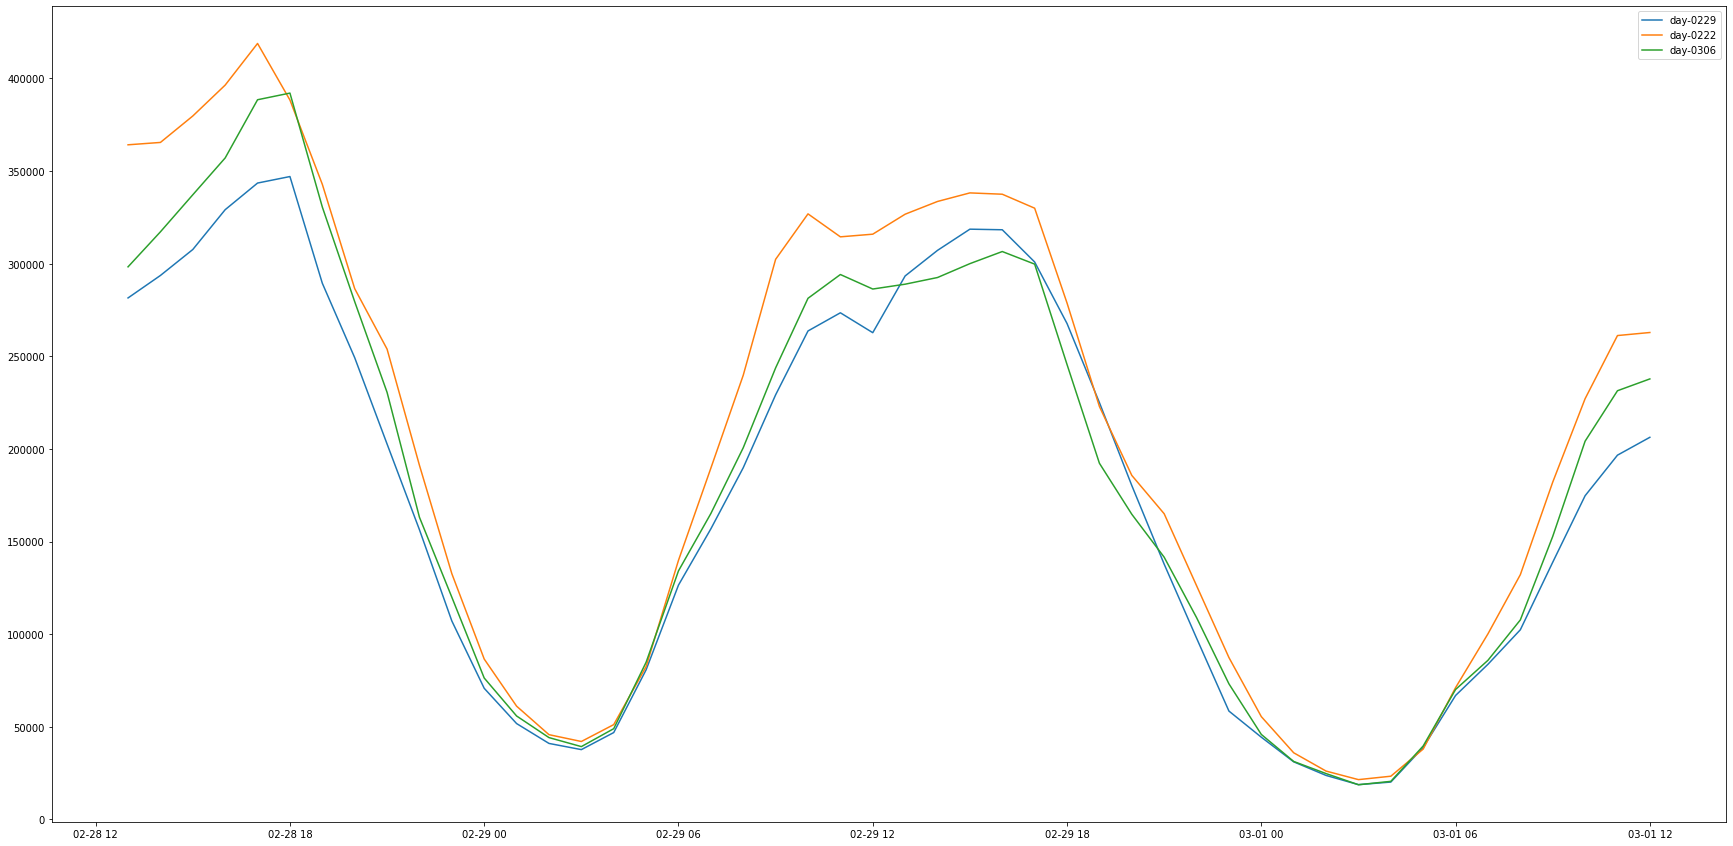

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (30, 15))
ax.plot(null_period_1['날짜'], null_period_1['10'], label='day-0229')
ax.plot(null_period_1['날짜'], null_period_2['10'], label='day-0222')
ax.plot(null_period_1['날짜'], null_period_3['10'], label='day-0306')
# ax.plot(null_period_2['날짜'], null_period_4['10'], label='day-0313')
# ax.plot(null_period_2['날짜'], null_period_5['10'], label='day-0215')

ax.plot()
ax.legend()


## 2020-03-30 결측치 처리

In [ ]:
train_0330 = new_train[new_train['날짜']<='2020-03-30 01:00:00']
train_0330

,날짜,10,100,101,120,121,140,150,160,200,...,1040,1100,1200,1510,2510,3000,4510,5510,6000,시간
0,2020-01-01 00:00:00,83247.0,19128.0,2611.0,5161.0,1588.0,892.0,32263.0,1636.0,7938.0,...,3482.0,11299.0,7072.0,1176.0,3810.0,748.0,3920.0,2133.0,3799.0,NaN
1,2020-01-01 01:00:00,89309.0,19027.0,3337.0,5502.0,1650.0,1043.0,35609.0,1644.0,9896.0,...,3849.0,13180.0,8771.0,1283.0,3763.0,782.0,3483.0,2057.0,4010.0,NaN
2,2020-01-01 02:00:00,66611.0,14710.0,2970.0,4631.0,1044.0,921.0,26821.0,1104.0,9343.0,...,2299.0,7986.0,5426.0,1536.0,3229.0,491.0,2634.0,1526.0,3388.0,NaN
3,2020-01-01 03:00:00,53290.0,13753.0,2270.0,4242.0,1021.0,790.0,21322.0,909.0,10009.0,...,1716.0,5703.0,3156.0,1104.0,2882.0,431.0,2488.0,1268.0,3686.0,NaN
4,2020-01-01 04:00:00,52095.0,17615.0,2406.0,3689.0,1840.0,922.0,22711.0,1354.0,15497.0,...,2421.0,5816.0,2933.0,1206.0,2433.0,499.0,2952.0,1927.0,5608.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2133,2020-03-29 21:00:00,270303.0,56878.0,4361.0,12717.0,4153.0,3611.0,118207.0,3841.0,8923.0,...,9857.0,19894.0,13318.0,4564.0,14240.0,1186.0,7661.0,6211.0,10965.0,21.0
2134,2020-03-29 22:00:00,201410.0,36764.0,2528.0,7939.0,2858.0,2096.0,80813.0,2358.0,5645.0,...,6849.0,13617.0,10090.0,2717.0,9167.0,699.0,4833.0,3769.0,6662.0,22.0
2135,2020-03-29 23:00:00,124144.0,22141.0,1717.0,4794.0,1572.0,1186.0,46682.0,1522.0,3325.0,...,3723.0,8194.0,6170.0,1740.0,5114.0,415.0,2996.0,2278.0,3697.0,23.0
2136,2020-03-30 00:00:00,38243.0,7403.0,585.0,1695.0,426.0,351.0,13476.0,430.0,1304.0,...,1257.0,2574.0,2011.0,521.0,1662.0,139.0,950.0,761.0,1130.0,0.0


In [ ]:
test_0330 = pd.date_range(start = '2020-03-30 02:00:00',
                     end = '2020-03-30 23:00:00',     
                     freq = 'H',          
                     )
test_0330 = pd.DataFrame(test_0330, columns=['ds'])
test_0330

,ds
0,2020-03-30 02:00:00
1,2020-03-30 03:00:00
2,2020-03-30 04:00:00
3,2020-03-30 05:00:00
4,2020-03-30 06:00:00
5,2020-03-30 07:00:00
6,2020-03-30 08:00:00
7,2020-03-30 09:00:00
8,2020-03-30 10:00:00
9,2020-03-30 11:00:00


In [ ]:
result_0330  = test_0330[:]

In [ ]:
for c in col:
    train_0330_sliced = train_0330[['날짜',c]]
    train_0330_sliced.columns = ['ds', 'y']
    pred = prop(train_0330_sliced, test_0330)
    result_0330 = pd.concat([result_0330, pred['yhat']], axis=1)
    # prop(df[''])

In [ ]:
train_0330

,날짜,10,100,101,120,121,140,150,160,200,...,1040,1100,1200,1510,2510,3000,4510,5510,6000,시간
0,2020-01-01 00:00:00,83247.0,19128.0,2611.0,5161.0,1588.0,892.0,32263.0,1636.0,7938.0,...,3482.0,11299.0,7072.0,1176.0,3810.0,748.0,3920.0,2133.0,3799.0,NaN
1,2020-01-01 01:00:00,89309.0,19027.0,3337.0,5502.0,1650.0,1043.0,35609.0,1644.0,9896.0,...,3849.0,13180.0,8771.0,1283.0,3763.0,782.0,3483.0,2057.0,4010.0,NaN
2,2020-01-01 02:00:00,66611.0,14710.0,2970.0,4631.0,1044.0,921.0,26821.0,1104.0,9343.0,...,2299.0,7986.0,5426.0,1536.0,3229.0,491.0,2634.0,1526.0,3388.0,NaN
3,2020-01-01 03:00:00,53290.0,13753.0,2270.0,4242.0,1021.0,790.0,21322.0,909.0,10009.0,...,1716.0,5703.0,3156.0,1104.0,2882.0,431.0,2488.0,1268.0,3686.0,NaN
4,2020-01-01 04:00:00,52095.0,17615.0,2406.0,3689.0,1840.0,922.0,22711.0,1354.0,15497.0,...,2421.0,5816.0,2933.0,1206.0,2433.0,499.0,2952.0,1927.0,5608.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2133,2020-03-29 21:00:00,270303.0,56878.0,4361.0,12717.0,4153.0,3611.0,118207.0,3841.0,8923.0,...,9857.0,19894.0,13318.0,4564.0,14240.0,1186.0,7661.0,6211.0,10965.0,21.0
2134,2020-03-29 22:00:00,201410.0,36764.0,2528.0,7939.0,2858.0,2096.0,80813.0,2358.0,5645.0,...,6849.0,13617.0,10090.0,2717.0,9167.0,699.0,4833.0,3769.0,6662.0,22.0
2135,2020-03-29 23:00:00,124144.0,22141.0,1717.0,4794.0,1572.0,1186.0,46682.0,1522.0,3325.0,...,3723.0,8194.0,6170.0,1740.0,5114.0,415.0,2996.0,2278.0,3697.0,23.0
2136,2020-03-30 00:00:00,38243.0,7403.0,585.0,1695.0,426.0,351.0,13476.0,430.0,1304.0,...,1257.0,2574.0,2011.0,521.0,1662.0,139.0,950.0,761.0,1130.0,0.0


In [ ]:
train_0330_drophour = train_0330.drop(['시간'], axis=1, inplace=False)
new_col = train_0330_drophour.columns
result_0330.columns = new_col
result_0330

,날짜,10,100,101,120,121,140,150,160,200,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,2020-03-30 02:00:00,25431.375636,5335.881865,69.291534,586.663512,185.528306,460.154753,13036.280531,-39.526654,46.510023,...,-61.482898,876.016278,-373.234835,1725.438922,924.947166,763.826045,-532.945494,17.519750,527.275445,198.930624
1,2020-03-30 03:00:00,42731.526407,11081.892829,590.423028,1720.644071,285.564152,657.312749,21540.073096,188.526870,959.073654,...,80.495073,1733.841577,1858.757009,2680.304367,1309.182659,1564.286881,-596.202796,258.273052,913.846642,1091.874360
2,2020-03-30 04:00:00,95530.837220,26591.526386,1934.841874,4085.728958,1599.631106,1412.751070,41870.861675,1088.571821,2907.203776,...,1185.831083,4620.712709,10326.186114,6624.370333,1924.756810,4365.771354,-78.055952,3256.523201,2950.520257,4778.801285
3,2020-03-30 05:00:00,171355.538148,48485.239333,3873.494643,7381.498234,4073.373879,2638.601802,68573.524881,2513.932344,5411.960651,...,3212.210311,9036.499015,23151.404841,12756.245202,2582.460908,8767.590431,1038.838003,8886.946478,6313.139670,10572.464124
4,2020-03-30 06:00:00,249015.766024,71042.555261,6049.649187,11416.191783,7043.225036,4084.079421,95148.728336,4114.314572,8057.355722,...,5632.935513,13573.992579,35653.369558,18885.078401,3271.535787,13833.175479,2405.343256,15354.789003,9958.927727,16686.902810
5,2020-03-30 07:00:00,307785.833989,89083.502136,8108.073122,15966.878961,9555.295130,5441.114572,116495.699006,5489.073955,10637.159020,...,7681.182742,16687.335939,43200.431467,22695.724421,4098.546607,18386.475330,3495.333483,20223.250285,12710.830538,21251.163708
6,2020-03-30 08:00:00,336461.628268,100026.949075,9745.185602,20450.459840,10881.222702,6447.541432,130087.379103,6358.308159,13015.016816,...,8756.716347,17642.680829,44109.159667,23205.815377,5087.524849,21411.105785,3929.827492,21977.907720,13911.825015,23307.432536
7,2020-03-30 09:00:00,337246.785841,104086.466038,10731.775291,23903.538670,10885.235300,6955.637921,135974.473532,6659.684570,14928.876415,...,8729.911621,16902.730333,40325.105129,21272.159588,6060.774709,22425.280821,3692.185755,20890.254313,13690.501279,23116.270753
8,2020-03-30 10:00:00,322750.554062,103199.306631,10987.978008,25510.427737,10026.011396,6973.668715,136279.846580,6538.149843,16040.992165,...,7965.051248,15662.456281,35551.381073,18795.635685,6742.328848,21694.964036,3090.566204,18573.570149,12724.203408,21714.834101
9,2020-03-30 11:00:00,308475.910094,99935.874590,10684.718845,25301.512733,9042.562401,6679.439434,134458.482287,6255.992625,16246.896727,...,7082.491153,14957.447216,32596.624312,17349.279162,6995.516978,20154.345552,2529.878807,16731.598067,11767.317294,20221.698671


In [ ]:
train_0330_drophour.columns

Index(['날짜', '10', '100', '101', '120', '121', '140', '150', '160', '200',
       '201', '251', '270', '300', '301', '351', '352', '370', '400', '450',
       '500', '550', '600', '650', '652', '1000', '1020', '1040', '1100',
       '1200', '1510', '2510', '3000', '4510', '5510', '6000'],
      dtype='object')

In [ ]:
train_after_0330 = train[train['날짜']>='2020-03-31 00:00:00']
train_after_0330 = train_after_0330.drop(['시간'], axis=1, inplace=False)
train_after_0330

,날짜,10,100,101,120,121,140,150,160,200,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
2127,2020-03-31 00:00:00,72733,13653,1141,3637,910,828,24503,722,1824,...,547,2345,5780,4718,873,3473,383,1887,1440,2077
2128,2020-03-31 01:00:00,53397,9749,974,2678,609,547,17050,577,1489,...,412,1648,3761,2949,916,3066,276,1259,1037,1440
2129,2020-03-31 02:00:00,44698,8898,774,2366,345,542,14889,527,1367,...,348,1520,3189,2166,869,2546,348,1351,888,1333
2130,2020-03-31 03:00:00,46848,11295,800,2547,461,719,15515,536,1469,...,367,1794,3303,1962,849,2683,294,1402,1039,1763
2131,2020-03-31 04:00:00,64299,18296,1368,4055,702,884,23853,789,1837,...,611,2457,5974,3394,906,3399,339,2444,1575,3038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,2020-05-17 19:00:00,311727,101285,10085,30637,10060,8749,148935,6801,26101,...,6726,15431,25597,14292,9300,22238,3786,16936,10729,20194
3275,2020-05-17 20:00:00,305354,91426,8607,26021,8095,7198,136503,6147,20759,...,5501,15378,24661,14747,8239,20604,3203,15018,9767,17962
3276,2020-05-17 21:00:00,306008,75113,6325,19933,5711,4494,129412,5134,14496,...,4216,12558,22781,14081,6392,17937,2447,12403,7825,14031
3277,2020-05-17 22:00:00,237447,49498,4209,12145,3891,2718,96698,3526,9363,...,2578,8870,16640,11066,4427,11955,1495,7507,5387,8889


In [ ]:
new_train_2 = pd.concat([train_0330_drophour, result_0330, train_after_0330], axis=0).reset_index(drop=True)
new_train_2

,날짜,10,100,101,120,121,140,150,160,200,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,2020-01-01 00:00:00,83247.0,19128.0,2611.0,5161.0,1588.0,892.0,32263.0,1636.0,7938.0,...,1311.0,3482.0,11299.0,7072.0,1176.0,3810.0,748.0,3920.0,2133.0,3799.0
1,2020-01-01 01:00:00,89309.0,19027.0,3337.0,5502.0,1650.0,1043.0,35609.0,1644.0,9896.0,...,1162.0,3849.0,13180.0,8771.0,1283.0,3763.0,782.0,3483.0,2057.0,4010.0
2,2020-01-01 02:00:00,66611.0,14710.0,2970.0,4631.0,1044.0,921.0,26821.0,1104.0,9343.0,...,768.0,2299.0,7986.0,5426.0,1536.0,3229.0,491.0,2634.0,1526.0,3388.0
3,2020-01-01 03:00:00,53290.0,13753.0,2270.0,4242.0,1021.0,790.0,21322.0,909.0,10009.0,...,632.0,1716.0,5703.0,3156.0,1104.0,2882.0,431.0,2488.0,1268.0,3686.0
4,2020-01-01 04:00:00,52095.0,17615.0,2406.0,3689.0,1840.0,922.0,22711.0,1354.0,15497.0,...,875.0,2421.0,5816.0,2933.0,1206.0,2433.0,499.0,2952.0,1927.0,5608.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2020-05-17 19:00:00,311727.0,101285.0,10085.0,30637.0,10060.0,8749.0,148935.0,6801.0,26101.0,...,6726.0,15431.0,25597.0,14292.0,9300.0,22238.0,3786.0,16936.0,10729.0,20194.0
3308,2020-05-17 20:00:00,305354.0,91426.0,8607.0,26021.0,8095.0,7198.0,136503.0,6147.0,20759.0,...,5501.0,15378.0,24661.0,14747.0,8239.0,20604.0,3203.0,15018.0,9767.0,17962.0
3309,2020-05-17 21:00:00,306008.0,75113.0,6325.0,19933.0,5711.0,4494.0,129412.0,5134.0,14496.0,...,4216.0,12558.0,22781.0,14081.0,6392.0,17937.0,2447.0,12403.0,7825.0,14031.0
3310,2020-05-17 22:00:00,237447.0,49498.0,4209.0,12145.0,3891.0,2718.0,96698.0,3526.0,9363.0,...,2578.0,8870.0,16640.0,11066.0,4427.0,11955.0,1495.0,7507.0,5387.0,8889.0


In [ ]:
condition1 = '2020-03-29 13:00:00' <= new_train_2['날짜']
condition2 = new_train_2['날짜'] <= '2020-03-31 12:00:00'
condition3 = '2020-03-22 13:00:00' <= new_train_2['날짜']
condition4 = new_train_2['날짜'] <= '2020-03-24 12:00:00'
condition5 = '2020-04-05 13:00:00' <= new_train_2['날짜']
condition6 = new_train_2['날짜'] <= '2020-04-07 12:00:00'
# condition7 = '2020-03-13 13:00:00' <= train['날짜']
# condition8 = train['날짜'] <= '2020-03-15 12:00:00'
# condition9 = '2020-02-14 13:00:00' <= train['날짜']
# condition10 = train['날짜'] <= '2020-02-16 12:00:00'
# <= '2020-03-02 23:00:00'
null_period_1 = new_train_2[condition1 & condition2]
null_period_2 = new_train_2[condition3 & condition4]
null_period_3 = new_train_2[condition5 & condition6]
# null_period_4 = train[condition7 & condition8]
# null_period_5 = train[condition9 & condition10]

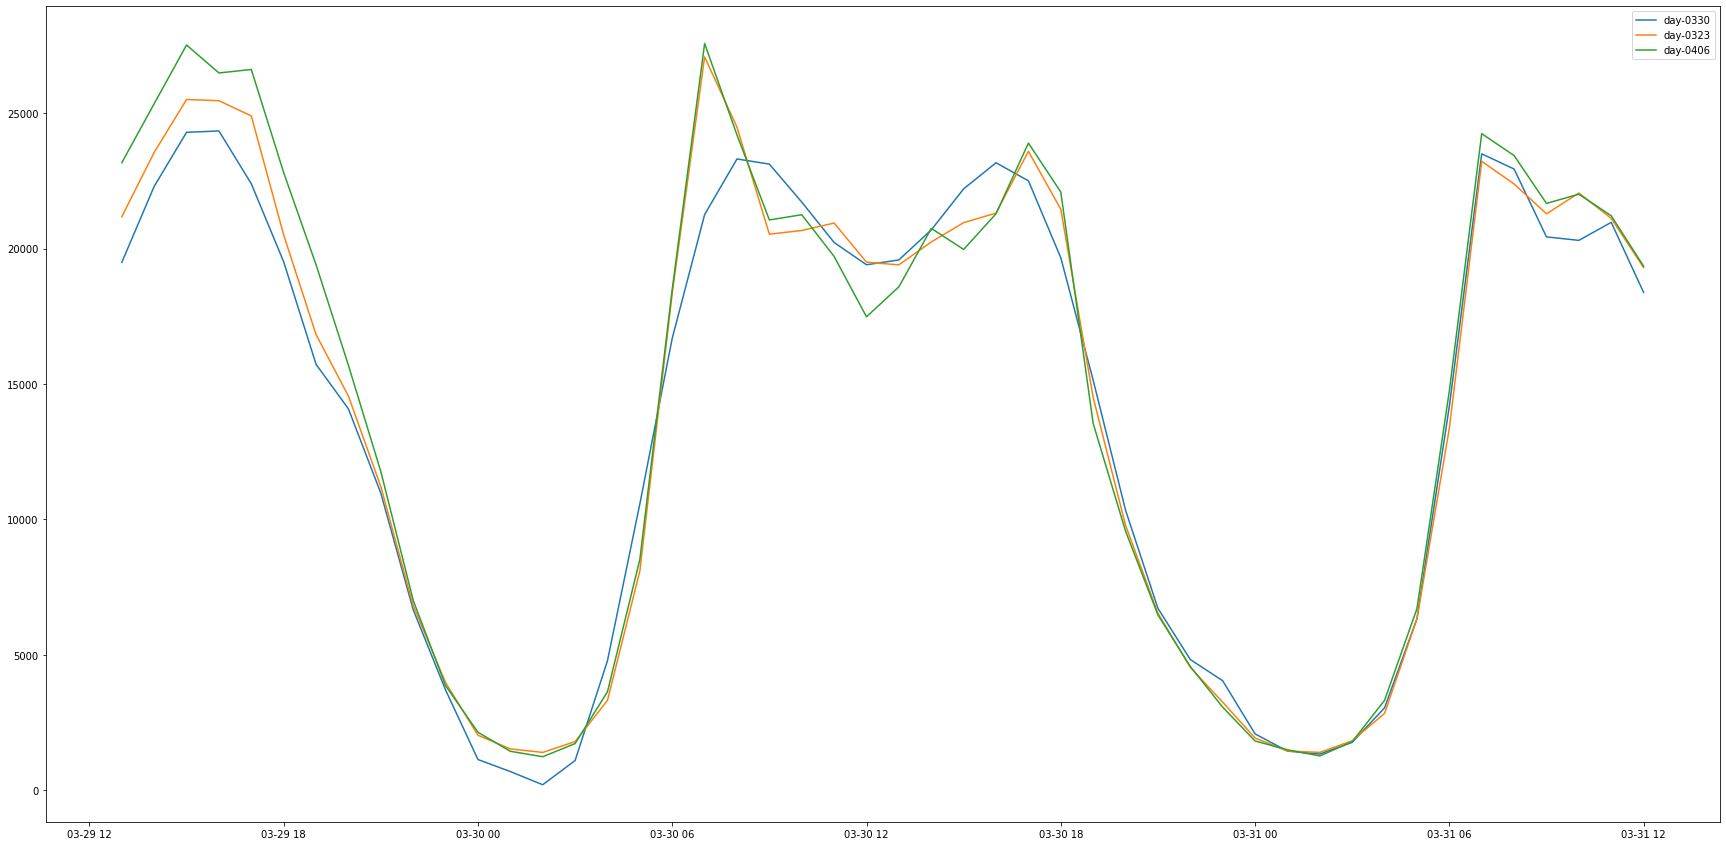

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (30, 15))
ax.plot(null_period_1['날짜'], null_period_1['6000'], label='day-0330')
ax.plot(null_period_1['날짜'], null_period_2['6000'], label='day-0323')
ax.plot(null_period_1['날짜'], null_period_3['6000'], label='day-0406')
# ax.plot(null_period_2['날짜'], null_period_4['10'], label='day-0313')
# ax.plot(null_period_2['날짜'], null_period_5['10'], label='day-0215')

ax.plot()
ax.legend()

In [ ]:
len(new_train_2.columns)

36

In [ ]:
under_zero_count = 0
for col in new_train_2.columns[1:]:
    under_zero_count += sum(new_train_2[col]<0)
print(under_zero_count)

# for col in new_train_2.columns[1:]:
#     new_train_2[col].where(new_train_2[col]>=0, 0, inplace=True)

17


In [ ]:
for col in new_train_2.columns[1:]:
    new_train_2[col].where(new_train_2[col]>=0, 0, inplace=True)

In [ ]:
under_zero_count = 0
for col in new_train_2.columns[1:]:
    under_zero_count += sum(new_train_2[col]<0)
print(under_zero_count)

0


In [ ]:
new_train_2

,날짜,10,100,101,120,121,140,150,160,200,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,2020-01-01 00:00:00,83247.0,19128.0,2611.0,5161.0,1588.0,892.0,32263.0,1636.0,7938.0,...,1311.0,3482.0,11299.0,7072.0,1176.0,3810.0,748.0,3920.0,2133.0,3799.0
1,2020-01-01 01:00:00,89309.0,19027.0,3337.0,5502.0,1650.0,1043.0,35609.0,1644.0,9896.0,...,1162.0,3849.0,13180.0,8771.0,1283.0,3763.0,782.0,3483.0,2057.0,4010.0
2,2020-01-01 02:00:00,66611.0,14710.0,2970.0,4631.0,1044.0,921.0,26821.0,1104.0,9343.0,...,768.0,2299.0,7986.0,5426.0,1536.0,3229.0,491.0,2634.0,1526.0,3388.0
3,2020-01-01 03:00:00,53290.0,13753.0,2270.0,4242.0,1021.0,790.0,21322.0,909.0,10009.0,...,632.0,1716.0,5703.0,3156.0,1104.0,2882.0,431.0,2488.0,1268.0,3686.0
4,2020-01-01 04:00:00,52095.0,17615.0,2406.0,3689.0,1840.0,922.0,22711.0,1354.0,15497.0,...,875.0,2421.0,5816.0,2933.0,1206.0,2433.0,499.0,2952.0,1927.0,5608.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2020-05-17 19:00:00,311727.0,101285.0,10085.0,30637.0,10060.0,8749.0,148935.0,6801.0,26101.0,...,6726.0,15431.0,25597.0,14292.0,9300.0,22238.0,3786.0,16936.0,10729.0,20194.0
3308,2020-05-17 20:00:00,305354.0,91426.0,8607.0,26021.0,8095.0,7198.0,136503.0,6147.0,20759.0,...,5501.0,15378.0,24661.0,14747.0,8239.0,20604.0,3203.0,15018.0,9767.0,17962.0
3309,2020-05-17 21:00:00,306008.0,75113.0,6325.0,19933.0,5711.0,4494.0,129412.0,5134.0,14496.0,...,4216.0,12558.0,22781.0,14081.0,6392.0,17937.0,2447.0,12403.0,7825.0,14031.0
3310,2020-05-17 22:00:00,237447.0,49498.0,4209.0,12145.0,3891.0,2718.0,96698.0,3526.0,9363.0,...,2578.0,8870.0,16640.0,11066.0,4427.0,11955.0,1495.0,7507.0,5387.0,8889.0


In [ ]:
new_train_2.to_csv('new_train.csv')

NameError: name 'new_train_2' is not defined

In [ ]:
new_train_2 = pd.read_csv('new_train.csv')
new_train_2

,Unnamed: 0,날짜,10,100,101,120,121,140,150,160,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,0,2020-01-01 00:00:00,83247.0,19128.0,2611.0,5161.0,1588.0,892.0,32263.0,1636.0,...,1311.0,3482.0,11299.0,7072.0,1176.0,3810.0,748.0,3920.0,2133.0,3799.0
1,1,2020-01-01 01:00:00,89309.0,19027.0,3337.0,5502.0,1650.0,1043.0,35609.0,1644.0,...,1162.0,3849.0,13180.0,8771.0,1283.0,3763.0,782.0,3483.0,2057.0,4010.0
2,2,2020-01-01 02:00:00,66611.0,14710.0,2970.0,4631.0,1044.0,921.0,26821.0,1104.0,...,768.0,2299.0,7986.0,5426.0,1536.0,3229.0,491.0,2634.0,1526.0,3388.0
3,3,2020-01-01 03:00:00,53290.0,13753.0,2270.0,4242.0,1021.0,790.0,21322.0,909.0,...,632.0,1716.0,5703.0,3156.0,1104.0,2882.0,431.0,2488.0,1268.0,3686.0
4,4,2020-01-01 04:00:00,52095.0,17615.0,2406.0,3689.0,1840.0,922.0,22711.0,1354.0,...,875.0,2421.0,5816.0,2933.0,1206.0,2433.0,499.0,2952.0,1927.0,5608.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,3307,2020-05-17 19:00:00,311727.0,101285.0,10085.0,30637.0,10060.0,8749.0,148935.0,6801.0,...,6726.0,15431.0,25597.0,14292.0,9300.0,22238.0,3786.0,16936.0,10729.0,20194.0
3308,3308,2020-05-17 20:00:00,305354.0,91426.0,8607.0,26021.0,8095.0,7198.0,136503.0,6147.0,...,5501.0,15378.0,24661.0,14747.0,8239.0,20604.0,3203.0,15018.0,9767.0,17962.0
3309,3309,2020-05-17 21:00:00,306008.0,75113.0,6325.0,19933.0,5711.0,4494.0,129412.0,5134.0,...,4216.0,12558.0,22781.0,14081.0,6392.0,17937.0,2447.0,12403.0,7825.0,14031.0
3310,3310,2020-05-17 22:00:00,237447.0,49498.0,4209.0,12145.0,3891.0,2718.0,96698.0,3526.0,...,2578.0,8870.0,16640.0,11066.0,4427.0,11955.0,1495.0,7507.0,5387.0,8889.0


In [ ]:
new_train_2.drop('Unnamed: 0', inplace=True, axis = 1)
new_train_2

,날짜,10,100,101,120,121,140,150,160,200,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,2020-01-01 00:00:00,83247.0,19128.0,2611.0,5161.0,1588.0,892.0,32263.0,1636.0,7938.0,...,1311.0,3482.0,11299.0,7072.0,1176.0,3810.0,748.0,3920.0,2133.0,3799.0
1,2020-01-01 01:00:00,89309.0,19027.0,3337.0,5502.0,1650.0,1043.0,35609.0,1644.0,9896.0,...,1162.0,3849.0,13180.0,8771.0,1283.0,3763.0,782.0,3483.0,2057.0,4010.0
2,2020-01-01 02:00:00,66611.0,14710.0,2970.0,4631.0,1044.0,921.0,26821.0,1104.0,9343.0,...,768.0,2299.0,7986.0,5426.0,1536.0,3229.0,491.0,2634.0,1526.0,3388.0
3,2020-01-01 03:00:00,53290.0,13753.0,2270.0,4242.0,1021.0,790.0,21322.0,909.0,10009.0,...,632.0,1716.0,5703.0,3156.0,1104.0,2882.0,431.0,2488.0,1268.0,3686.0
4,2020-01-01 04:00:00,52095.0,17615.0,2406.0,3689.0,1840.0,922.0,22711.0,1354.0,15497.0,...,875.0,2421.0,5816.0,2933.0,1206.0,2433.0,499.0,2952.0,1927.0,5608.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2020-05-17 19:00:00,311727.0,101285.0,10085.0,30637.0,10060.0,8749.0,148935.0,6801.0,26101.0,...,6726.0,15431.0,25597.0,14292.0,9300.0,22238.0,3786.0,16936.0,10729.0,20194.0
3308,2020-05-17 20:00:00,305354.0,91426.0,8607.0,26021.0,8095.0,7198.0,136503.0,6147.0,20759.0,...,5501.0,15378.0,24661.0,14747.0,8239.0,20604.0,3203.0,15018.0,9767.0,17962.0
3309,2020-05-17 21:00:00,306008.0,75113.0,6325.0,19933.0,5711.0,4494.0,129412.0,5134.0,14496.0,...,4216.0,12558.0,22781.0,14081.0,6392.0,17937.0,2447.0,12403.0,7825.0,14031.0
3310,2020-05-17 22:00:00,237447.0,49498.0,4209.0,12145.0,3891.0,2718.0,96698.0,3526.0,9363.0,...,2578.0,8870.0,16640.0,11066.0,4427.0,11955.0,1495.0,7507.0,5387.0,8889.0


In [ ]:
valid = pd.read_csv(os.path.join(DATASET_PATH, 'validate.csv'))

In [ ]:
valid = valid.iloc[168:,:].reset_index(drop=True)

In [ ]:
valid

,날짜,시간,10,100,101,120,121,140,150,160,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200518,0,82065,15172,1500,3294,1086,962,28931,1103,...,618,2790,5147,4331,1329,3665,404,2242,1619,2314
1,20200518,1,51248,9840,813,2356,696,546,17888,720,...,430,1864,3269,2561,921,2081,272,1390,1003,1766
2,20200518,2,39026,7894,760,2413,408,549,13357,498,...,322,1313,2765,1931,920,1764,228,1136,922,1309
3,20200518,3,40993,10137,780,2701,420,741,15544,532,...,326,1766,3320,2060,892,2447,337,1495,975,1912
4,20200518,4,77863,19603,1276,5019,968,1160,32101,968,...,669,2914,6986,3911,1368,4380,513,2940,1758,3629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,20200524,19,314226,98345,10625,28618,8316,6684,141675,6619,...,8254,16118,23304,14082,8447,21694,2180,15746,10903,21014
164,20200524,20,300001,87871,8226,22706,6981,5743,142933,6295,...,5225,15297,21919,14526,7332,19732,1990,14096,10028,17787
165,20200524,21,304150,71126,6002,18317,4939,3779,133110,4781,...,4072,12685,21135,14403,5443,16967,1359,11670,7963,14041
166,20200524,22,236751,44947,3575,11455,3135,2536,98582,3267,...,2489,8093,14427,10914,3861,11397,859,7270,5194,8230


In [ ]:
valid = day_plus_hour(valid)
valid

,날짜,시간,10,100,101,120,121,140,150,160,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,2020-05-18 00:00:00,0,82065,15172,1500,3294,1086,962,28931,1103,...,618,2790,5147,4331,1329,3665,404,2242,1619,2314
1,2020-05-18 01:00:00,1,51248,9840,813,2356,696,546,17888,720,...,430,1864,3269,2561,921,2081,272,1390,1003,1766
2,2020-05-18 02:00:00,2,39026,7894,760,2413,408,549,13357,498,...,322,1313,2765,1931,920,1764,228,1136,922,1309
3,2020-05-18 03:00:00,3,40993,10137,780,2701,420,741,15544,532,...,326,1766,3320,2060,892,2447,337,1495,975,1912
4,2020-05-18 04:00:00,4,77863,19603,1276,5019,968,1160,32101,968,...,669,2914,6986,3911,1368,4380,513,2940,1758,3629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2020-05-24 19:00:00,19,314226,98345,10625,28618,8316,6684,141675,6619,...,8254,16118,23304,14082,8447,21694,2180,15746,10903,21014
164,2020-05-24 20:00:00,20,300001,87871,8226,22706,6981,5743,142933,6295,...,5225,15297,21919,14526,7332,19732,1990,14096,10028,17787
165,2020-05-24 21:00:00,21,304150,71126,6002,18317,4939,3779,133110,4781,...,4072,12685,21135,14403,5443,16967,1359,11670,7963,14041
166,2020-05-24 22:00:00,22,236751,44947,3575,11455,3135,2536,98582,3267,...,2489,8093,14427,10914,3861,11397,859,7270,5194,8230


In [ ]:
final_train = pd.concat([new_train_2, valid], axis=0).reset_index(drop=True).drop(['시간'], axis=1)

In [ ]:
final_train

,날짜,10,100,101,120,121,140,150,160,200,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,2020-01-01 00:00:00,83247.0,19128.0,2611.0,5161.0,1588.0,892.0,32263.0,1636.0,7938.0,...,1311.0,3482.0,11299.0,7072.0,1176.0,3810.0,748.0,3920.0,2133.0,3799.0
1,2020-01-01 01:00:00,89309.0,19027.0,3337.0,5502.0,1650.0,1043.0,35609.0,1644.0,9896.0,...,1162.0,3849.0,13180.0,8771.0,1283.0,3763.0,782.0,3483.0,2057.0,4010.0
2,2020-01-01 02:00:00,66611.0,14710.0,2970.0,4631.0,1044.0,921.0,26821.0,1104.0,9343.0,...,768.0,2299.0,7986.0,5426.0,1536.0,3229.0,491.0,2634.0,1526.0,3388.0
3,2020-01-01 03:00:00,53290.0,13753.0,2270.0,4242.0,1021.0,790.0,21322.0,909.0,10009.0,...,632.0,1716.0,5703.0,3156.0,1104.0,2882.0,431.0,2488.0,1268.0,3686.0
4,2020-01-01 04:00:00,52095.0,17615.0,2406.0,3689.0,1840.0,922.0,22711.0,1354.0,15497.0,...,875.0,2421.0,5816.0,2933.0,1206.0,2433.0,499.0,2952.0,1927.0,5608.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,2020-05-24 19:00:00,314226.0,98345.0,10625.0,28618.0,8316.0,6684.0,141675.0,6619.0,23535.0,...,8254.0,16118.0,23304.0,14082.0,8447.0,21694.0,2180.0,15746.0,10903.0,21014.0
3476,2020-05-24 20:00:00,300001.0,87871.0,8226.0,22706.0,6981.0,5743.0,142933.0,6295.0,20953.0,...,5225.0,15297.0,21919.0,14526.0,7332.0,19732.0,1990.0,14096.0,10028.0,17787.0
3477,2020-05-24 21:00:00,304150.0,71126.0,6002.0,18317.0,4939.0,3779.0,133110.0,4781.0,15242.0,...,4072.0,12685.0,21135.0,14403.0,5443.0,16967.0,1359.0,11670.0,7963.0,14041.0
3478,2020-05-24 22:00:00,236751.0,44947.0,3575.0,11455.0,3135.0,2536.0,98582.0,3267.0,8849.0,...,2489.0,8093.0,14427.0,10914.0,3861.0,11397.0,859.0,7270.0,5194.0,8230.0


In [ ]:
test = day_plus_hour(test)
test

,날짜,시간,10,100,101,120,121,140,150,160,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,2020-05-18 00:00:00,0,82065,15172,1500,3294,1086,962,28931,1103,...,618,2790,5147,4331,1329,3665,404,2242,1619,2314
1,2020-05-18 01:00:00,1,51248,9840,813,2356,696,546,17888,720,...,430,1864,3269,2561,921,2081,272,1390,1003,1766
2,2020-05-18 02:00:00,2,39026,7894,760,2413,408,549,13357,498,...,322,1313,2765,1931,920,1764,228,1136,922,1309
3,2020-05-18 03:00:00,3,40993,10137,780,2701,420,741,15544,532,...,326,1766,3320,2060,892,2447,337,1495,975,1912
4,2020-05-18 04:00:00,4,77863,19603,1276,5019,968,1160,32101,968,...,669,2914,6986,3911,1368,4380,513,2940,1758,3629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,2020-05-31 19:00:00,19,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
332,2020-05-31 20:00:00,20,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
333,2020-05-31 21:00:00,21,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
334,2020-05-31 22:00:00,22,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [ ]:
test = test.rename(columns = {"날짜":"ds"})

In [ ]:
test = test[test['ds'] >= '2020-05-25 00:00:00'].reset_index(drop=True)
test

,ds,시간,10,100,101,120,121,140,150,160,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,2020-05-25 00:00:00,0,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,2020-05-25 01:00:00,1,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,2020-05-25 02:00:00,2,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,2020-05-25 03:00:00,3,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,2020-05-25 04:00:00,4,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2020-05-31 19:00:00,19,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
164,2020-05-31 20:00:00,20,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
165,2020-05-31 21:00:00,21,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
166,2020-05-31 22:00:00,22,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [ ]:
input_test = test['ds']
input_test = pd.DataFrame(input_test)
input_test

,ds
0,2020-05-25 00:00:00
1,2020-05-25 01:00:00
2,2020-05-25 02:00:00
3,2020-05-25 03:00:00
4,2020-05-25 04:00:00
...,...
163,2020-05-31 19:00:00
164,2020-05-31 20:00:00
165,2020-05-31 21:00:00
166,2020-05-31 22:00:00


In [ ]:
submission_file_path = os.path.join(DATASET_PATH, 'sample_submission.csv')
submission_table = pd.read_csv(submission_file_path)
submission_table

,timestamp,10,100,101,120,121,140,150,160,200,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200525_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20200525_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20200525_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20200525_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20200525_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,20200531_19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
164,20200531_20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165,20200531_21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166,20200531_22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
col = final_train.columns[1:]
col

Index(['10', '100', '101', '120', '121', '140', '150', '160', '200', '201',
       '251', '270', '300', '301', '351', '352', '370', '400', '450', '500',
       '550', '600', '650', '652', '1000', '1020', '1040', '1100', '1200',
       '1510', '2510', '3000', '4510', '5510', '6000'],
      dtype='object')

In [ ]:
final_train

,날짜,10,100,101,120,121,140,150,160,200,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,2020-01-01 00:00:00,83247.0,19128.0,2611.0,5161.0,1588.0,892.0,32263.0,1636.0,7938.0,...,1311.0,3482.0,11299.0,7072.0,1176.0,3810.0,748.0,3920.0,2133.0,3799.0
1,2020-01-01 01:00:00,89309.0,19027.0,3337.0,5502.0,1650.0,1043.0,35609.0,1644.0,9896.0,...,1162.0,3849.0,13180.0,8771.0,1283.0,3763.0,782.0,3483.0,2057.0,4010.0
2,2020-01-01 02:00:00,66611.0,14710.0,2970.0,4631.0,1044.0,921.0,26821.0,1104.0,9343.0,...,768.0,2299.0,7986.0,5426.0,1536.0,3229.0,491.0,2634.0,1526.0,3388.0
3,2020-01-01 03:00:00,53290.0,13753.0,2270.0,4242.0,1021.0,790.0,21322.0,909.0,10009.0,...,632.0,1716.0,5703.0,3156.0,1104.0,2882.0,431.0,2488.0,1268.0,3686.0
4,2020-01-01 04:00:00,52095.0,17615.0,2406.0,3689.0,1840.0,922.0,22711.0,1354.0,15497.0,...,875.0,2421.0,5816.0,2933.0,1206.0,2433.0,499.0,2952.0,1927.0,5608.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,2020-05-24 19:00:00,314226.0,98345.0,10625.0,28618.0,8316.0,6684.0,141675.0,6619.0,23535.0,...,8254.0,16118.0,23304.0,14082.0,8447.0,21694.0,2180.0,15746.0,10903.0,21014.0
3476,2020-05-24 20:00:00,300001.0,87871.0,8226.0,22706.0,6981.0,5743.0,142933.0,6295.0,20953.0,...,5225.0,15297.0,21919.0,14526.0,7332.0,19732.0,1990.0,14096.0,10028.0,17787.0
3477,2020-05-24 21:00:00,304150.0,71126.0,6002.0,18317.0,4939.0,3779.0,133110.0,4781.0,15242.0,...,4072.0,12685.0,21135.0,14403.0,5443.0,16967.0,1359.0,11670.0,7963.0,14041.0
3478,2020-05-24 22:00:00,236751.0,44947.0,3575.0,11455.0,3135.0,2536.0,98582.0,3267.0,8849.0,...,2489.0,8093.0,14427.0,10914.0,3861.0,11397.0,859.0,7270.0,5194.0,8230.0


In [ ]:
def n_prop(df, test_df):
    m = NeuralProphet(daily_seasonality=True)
    m.add_country_holidays(country_name='KR')
    # m.add_country_holidays(country_name='KR')
    loss = m.fit(df, freq='H')
    df_pred = m.make_future_dataframe(df, periods=168)
    pred = m.predict(df_pred)
    
    return pred

In [ ]:
input_test

,ds
0,2020-05-25 00:00:00
1,2020-05-25 01:00:00
2,2020-05-25 02:00:00
3,2020-05-25 03:00:00
4,2020-05-25 04:00:00
...,...
163,2020-05-31 19:00:00
164,2020-05-31 20:00:00
165,2020-05-31 21:00:00
166,2020-05-31 22:00:00


In [ ]:
for c in col:
    train_sliced = final_train[['날짜',c]]
    train_sliced.columns = ['ds', 'y']
    pred = n_prop(train_sliced, input_test)
    submission_table[c] = list(pred['yhat1'])

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/df_utils.py:314: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "ds"] = pd.to_datetime(df.loc[:, "ds"])

INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 132
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/utils.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  additive_events_dims = additive_events

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.24E-02, min: 1.61E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.24E-02, min: 1.38E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.50E-02, min: 1.61E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.32E-02
Epoch[132/132]: 100% 132/132 [00:24<00:00,  5.32it/s, SmoothL1Loss=0.00435, MAE=2.67e+4, RMSE=3.62e+4, RegLoss=0]
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/forecaster.py:395: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/df_utils.py:314: SettingWithCopyWarning: 
A value is trying to be set on a 

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.48E-02, min: 1.38E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.48E-02, min: 1.49E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.48E-02, min: 1.49E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.48E-02
Epoch[132/132]: 100% 132/132 [00:24<00:00,  5.35it/s, SmoothL1Loss=0.00542, MAE=9.42e+3, RMSE=1.3e+4, RegLoss=0] 
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/forecaster.py:395: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/df_utils.py:314: SettingWithCopyWarning: 
A value is trying to be set on a 

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.25E-01, min: 1.11E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.35E-01, min: 1.19E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.25E-01, min: 1.19E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.28E-01
Epoch[132/132]: 100% 132/132 [00:24<00:00,  5.32it/s, SmoothL1Loss=0.0116, MAE=1.52e+3, RMSE=2.26e+3, RegLoss=0]
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/forecaster.py:395: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/df_utils.py:314: SettingWithCopyWarning: 
A value is trying to be set on a c

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.48E-02, min: 1.61E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.48E-02, min: 1.49E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.48E-02, min: 1.28E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.48E-02
Epoch[132/132]: 100% 132/132 [00:24<00:00,  5.34it/s, SmoothL1Loss=0.0109, MAE=3.7e+3, RMSE=5.42e+3, RegLoss=0] 
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/forecaster.py:395: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/df_utils.py:314: SettingWithCopyWarning: 
A value is trying to be set on a c

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.48E-02, min: 1.03E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.48E-02, min: 1.73E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.91E-02, min: 9.51E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.62E-02
Epoch[132/132]: 100% 132/132 [00:24<00:00,  5.35it/s, SmoothL1Loss=0.008, MAE=1.23e+3, RMSE=1.74e+3, RegLoss=0]  
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/forecaster.py:395: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/df_utils.py:314: SettingWithCopyWarning: 
A value is trying to be set on a 

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.37E-02, min: 1.49E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.37E-02, min: 1.19E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.37E-02, min: 1.73E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 6.37E-02
Epoch[132/132]: 100% 132/132 [00:24<00:00,  5.35it/s, SmoothL1Loss=0.0106, MAE=1.04e+3, RMSE=1.47e+3, RegLoss=0]
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/forecaster.py:395: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/df_utils.py:314: SettingWithCopyWarning: 
A value is trying to be set on a c

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.87E-02, min: 1.19E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.41E-02, min: 1.19E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.87E-02, min: 2.02E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 7.04E-02
Epoch[132/132]: 100% 132/132 [00:24<00:00,  5.34it/s, SmoothL1Loss=0.00528, MAE=1.45e+4, RMSE=1.91e+4, RegLoss=0]
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/forecaster.py:395: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/df_utils.py:314: SettingWithCopyWarning: 
A value is trying to be set on a 

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.09E-02, min: 1.19E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.72E-02, min: 1.49E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.09E-02, min: 1.73E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.96E-02
Epoch[132/132]: 100% 132/132 [00:24<00:00,  5.35it/s, SmoothL1Loss=0.00588, MAE=671, RMSE=924, RegLoss=0]    
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/forecaster.py:395: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/df_utils.py:314: SettingWithCopyWarning: 
A value is trying to be set on a copy

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.48E-02, min: 2.02E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.91E-02, min: 1.03E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.91E-02, min: 1.38E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.77E-02
Epoch[132/132]: 100% 132/132 [00:24<00:00,  5.34it/s, SmoothL1Loss=0.00845, MAE=2.74e+3, RMSE=3.63e+3, RegLoss=0]
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/forecaster.py:395: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/df_utils.py:314: SettingWithCopyWarning: 
A value is trying to be set on a 

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.91E-02, min: 1.38E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.09E-02, min: 1.49E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.09E-02, min: 1.38E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.35E-02
Epoch[132/132]: 100% 132/132 [00:24<00:00,  5.34it/s, SmoothL1Loss=0.00921, MAE=1.14e+3, RMSE=1.65e+3, RegLoss=0]
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/forecaster.py:395: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/df_utils.py:314: SettingWithCopyWarning: 
A value is trying to be set on a 

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.09E-02, min: 9.51E-01


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.48E-02, min: 1.38E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.48E-02, min: 1.73E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.35E-02
Epoch[132/132]: 100% 132/132 [00:24<00:00,  5.34it/s, SmoothL1Loss=0.00578, MAE=7.31e+3, RMSE=9.95e+3, RegLoss=0]
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/forecaster.py:395: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/df_utils.py:314: SettingWithCopyWarning: 
A value is trying to be set on a 

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.48E-02, min: 1.61E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.09E-02, min: 9.51E-01


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.09E-02, min: 7.59E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.22E-02
Epoch[132/132]: 100% 132/132 [00:24<00:00,  5.36it/s, SmoothL1Loss=0.00964, MAE=2.5e+3, RMSE=3.52e+3, RegLoss=0] 
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/forecaster.py:395: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/df_utils.py:314: SettingWithCopyWarning: 
A value is trying to be set on a 

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.72E-02, min: 8.19E-01


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.38E-02, min: 1.73E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.38E-02, min: 1.49E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.49E-02
Epoch[132/132]: 100% 132/132 [00:24<00:00,  5.34it/s, SmoothL1Loss=0.0104, MAE=4.35e+3, RMSE=6.01e+3, RegLoss=0]
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/forecaster.py:395: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/df_utils.py:314: SettingWithCopyWarning: 
A value is trying to be set on a c

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.28E-01, min: 1.38E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.50E-02, min: 1.61E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.12E-01, min: 1.49E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.19E-01
Epoch[132/132]: 100% 132/132 [00:24<00:00,  5.35it/s, SmoothL1Loss=0.00976, MAE=2.76e+3, RMSE=3.78e+3, RegLoss=0]
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/forecaster.py:395: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/df_utils.py:314: SettingWithCopyWarning: 
A value is trying to be set on a 

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.87E-02, min: 1.28E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.09E-02, min: 1.19E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.09E-02, min: 1.03E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.62E-02
Epoch[132/132]: 100% 132/132 [00:24<00:00,  5.36it/s, SmoothL1Loss=0.0109, MAE=5.79e+3, RMSE=8.24e+3, RegLoss=0]
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/forecaster.py:395: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/df_utils.py:314: SettingWithCopyWarning: 
A value is trying to be set on a c

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.01E-02, min: 1.38E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.24E-02, min: 1.28E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.24E-02, min: 1.73E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.16E-02
Epoch[132/132]: 100% 132/132 [00:24<00:00,  5.36it/s, SmoothL1Loss=0.00563, MAE=6.51e+3, RMSE=8.63e+3, RegLoss=0]
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/forecaster.py:395: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/df_utils.py:314: SettingWithCopyWarning: 
A value is trying to be set on a 

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.01E-02, min: 1.73E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.79E-02, min: 1.11E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.50E-02, min: 1.11E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.08E-02
Epoch[132/132]: 100% 132/132 [00:24<00:00,  5.29it/s, SmoothL1Loss=0.00556, MAE=1.27e+3, RMSE=1.6e+3, RegLoss=0] 
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/forecaster.py:395: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/df_utils.py:314: SettingWithCopyWarning: 
A value is trying to be set on a 

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.06E-02, min: 9.51E-01


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.38E-02, min: 1.11E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.77E-02, min: 1.11E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.06E-02
Epoch[132/132]: 100% 132/132 [00:25<00:00,  5.28it/s, SmoothL1Loss=0.00712, MAE=3.9e+3, RMSE=5.21e+3, RegLoss=0] 
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/forecaster.py:395: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/df_utils.py:314: SettingWithCopyWarning: 
A value is trying to be set on a 

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.50E-02, min: 1.28E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.77E-02, min: 9.51E-01


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.50E-02, min: 1.49E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.58E-02
Epoch[132/132]: 100% 132/132 [00:24<00:00,  5.34it/s, SmoothL1Loss=0.00503, MAE=6.55e+3, RMSE=8.82e+3, RegLoss=0]
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/forecaster.py:395: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/df_utils.py:314: SettingWithCopyWarning: 
A value is trying to be set on a 

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.91E-02, min: 1.19E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.37E-02, min: 1.38E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.37E-02, min: 1.28E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 6.22E-02
Epoch[132/132]: 100% 132/132 [00:24<00:00,  5.30it/s, SmoothL1Loss=0.00512, MAE=1.06e+4, RMSE=1.4e+4, RegLoss=0] 
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/forecaster.py:395: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/df_utils.py:314: SettingWithCopyWarning: 
A value is trying to be set on a 

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.87E-02, min: 1.11E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.41E-02, min: 1.11E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.98E-02, min: 1.03E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 7.41E-02
Epoch[132/132]: 100% 132/132 [00:24<00:00,  5.34it/s, SmoothL1Loss=0.0107, MAE=1.1e+4, RMSE=1.54e+4, RegLoss=0] 
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/forecaster.py:395: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/df_utils.py:314: SettingWithCopyWarning: 
A value is trying to be set on a c

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.77E-02, min: 8.82E-01


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.77E-02, min: 9.51E-01


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.38E-02, min: 1.11E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.96E-02
Epoch[132/132]: 100% 132/132 [00:24<00:00,  5.32it/s, SmoothL1Loss=0.00938, MAE=4.43e+3, RMSE=5.67e+3, RegLoss=0]
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/forecaster.py:395: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/df_utils.py:314: SettingWithCopyWarning: 
A value is trying to be set on a 

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.06E-02, min: 1.73E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.06E-02, min: 1.49E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.38E-02, min: 1.19E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.16E-02
Epoch[132/132]: 100% 132/132 [00:24<00:00,  5.33it/s, SmoothL1Loss=0.00965, MAE=2.75e+3, RMSE=3.81e+3, RegLoss=0]
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/forecaster.py:395: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/df_utils.py:314: SettingWithCopyWarning: 
A value is trying to be set on a 

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.91E-02, min: 1.28E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.48E-02, min: 1.19E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.48E-02, min: 1.73E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.62E-02
Epoch[132/132]: 100% 132/132 [00:24<00:00,  5.33it/s, SmoothL1Loss=0.00969, MAE=1.34e+3, RMSE=1.91e+3, RegLoss=0]
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/forecaster.py:395: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/df_utils.py:314: SettingWithCopyWarning: 
A value is trying to be set on a 

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.09E-02, min: 2.02E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.09E-02, min: 1.73E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.72E-02, min: 1.73E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.96E-02
Epoch[132/132]: 100% 132/132 [00:24<00:00,  5.33it/s, SmoothL1Loss=0.00584, MAE=1.39e+4, RMSE=1.95e+4, RegLoss=0]
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/forecaster.py:395: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/df_utils.py:314: SettingWithCopyWarning: 
A value is trying to be set on a 

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.38E-02, min: 1.49E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.38E-02, min: 1.49E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.06E-02, min: 1.11E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.27E-02
Epoch[132/132]: 100% 132/132 [00:24<00:00,  5.29it/s, SmoothL1Loss=0.0102, MAE=1.12e+3, RMSE=1.59e+3, RegLoss=0]
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/forecaster.py:395: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/df_utils.py:314: SettingWithCopyWarning: 
A value is trying to be set on a c

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.28E-02, min: 1.49E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.61E-02, min: 1.61E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.28E-02, min: 1.38E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 9.05E-02
Epoch[132/132]: 100% 132/132 [00:24<00:00,  5.34it/s, SmoothL1Loss=0.00521, MAE=1.31e+3, RMSE=1.86e+3, RegLoss=0]
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/forecaster.py:395: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/df_utils.py:314: SettingWithCopyWarning: 
A value is trying to be set on a 

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.35E-01, min: 1.11E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.57E-01, min: 1.49E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.57E-01, min: 1.49E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.49E-01
Epoch[132/132]: 100% 132/132 [00:24<00:00,  5.35it/s, SmoothL1Loss=0.00734, MAE=4.16e+3, RMSE=5.82e+3, RegLoss=0]
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/forecaster.py:395: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/df_utils.py:314: SettingWithCopyWarning: 
A value is trying to be set on a 

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.77E-02, min: 9.51E-01


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.38E-02, min: 8.19E-01


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.77E-02, min: 1.38E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.96E-02
Epoch[132/132]: 100% 132/132 [00:24<00:00,  5.38it/s, SmoothL1Loss=0.0065, MAE=1.92e+3, RMSE=2.67e+3, RegLoss=0] 
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/forecaster.py:395: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/df_utils.py:314: SettingWithCopyWarning: 
A value is trying to be set on a 

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.91E-02, min: 1.38E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.91E-02, min: 1.49E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.91E-02, min: 8.82E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.91E-02
Epoch[132/132]: 100% 132/132 [00:24<00:00,  5.39it/s, SmoothL1Loss=0.0149, MAE=1.39e+3, RMSE=2.03e+3, RegLoss=0]
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/forecaster.py:395: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/df_utils.py:314: SettingWithCopyWarning: 
A value is trying to be set on a c

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.09E-02, min: 1.61E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.48E-02, min: 1.73E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.48E-02, min: 1.73E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.35E-02
Epoch[132/132]: 100% 132/132 [00:24<00:00,  5.40it/s, SmoothL1Loss=0.00712, MAE=2.7e+3, RMSE=3.62e+3, RegLoss=0] 
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/forecaster.py:395: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/df_utils.py:314: SettingWithCopyWarning: 
A value is trying to be set on a 

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.38E-02, min: 1.28E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.09E-02, min: 1.38E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.38E-02, min: 7.59E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.60E-02
Epoch[132/132]: 100% 132/132 [00:24<00:00,  5.37it/s, SmoothL1Loss=0.011, MAE=634, RMSE=855, RegLoss=0]      
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/forecaster.py:395: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/df_utils.py:314: SettingWithCopyWarning: 
A value is trying to be set on a copy

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.00E-01, min: 1.87E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.61E-02, min: 1.49E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.28E-02, min: 1.49E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 9.28E-02
Epoch[132/132]: 100% 132/132 [00:24<00:00,  5.35it/s, SmoothL1Loss=0.00703, MAE=1.96e+3, RMSE=2.8e+3, RegLoss=0] 
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/forecaster.py:395: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/df_utils.py:314: SettingWithCopyWarning: 
A value is trying to be set on a 

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.28E-02, min: 2.17E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.28E-02, min: 1.28E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.28E-02, min: 1.38E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 9.28E-02
Epoch[132/132]: 100% 132/132 [00:24<00:00,  5.39it/s, SmoothL1Loss=0.00681, MAE=1.29e+3, RMSE=1.79e+3, RegLoss=0]
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/forecaster.py:395: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/df_utils.py:314: SettingWithCopyWarning: 
A value is trying to be set on a 

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.37E-02, min: 1.49E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.98E-02, min: 1.38E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.41E-02, min: 9.51E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 7.22E-02
Epoch[132/132]: 100% 132/132 [00:24<00:00,  5.40it/s, SmoothL1Loss=0.00632, MAE=2.21e+3, RMSE=3.05e+3, RegLoss=0]
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/neuralprophet/forecaster.py:395: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.8/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



In [ ]:
print(pred['yhat1'])

0       2864.828125
1       2575.745361
2       3132.918457
3       2889.157227
4       3381.033691
           ...     
163    17508.406250
164    12030.985352
165     8790.238281
166     6991.732910
167     4765.471680
Name: yhat1, Length: 168, dtype: float64


## Dataloader
* 한 칼럼에 대한 7일(168행) 데이터를 input_data, 뒤따르는 7일 데이터를 output_data로 반환합니다.
* 도로별 차이를 두지 않고 모든 도로를 동일한 타입의 데이터로 취급합니다.
* 모든 csv 파일의 마지막 168행은 예측해야하는 값이므로 input으로 들어가지 않습니다.

In [ ]:
submission_table

,timestamp,10,100,101,120,121,140,150,160,200,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200525_0,80769.070312,17691.279297,1010.091431,6212.649902,927.055115,1078.094604,32168.904297,1228.677490,4730.865723,...,609.959290,3375.865723,-1218.362915,3904.840088,1754.473511,4812.647461,-66.945343,2820.685059,1895.191284,2864.828125
1,20200525_1,63596.355469,14458.913086,819.557739,5323.602539,718.657837,887.716614,25192.578125,988.561646,4177.548340,...,456.607391,2963.595947,-2195.043213,2845.890381,1461.220947,4011.194092,-192.981888,2582.952393,1729.288452,2575.745361
2,20200525_2,58033.019531,15171.831055,938.360840,5219.004395,905.299622,978.995667,21291.521484,963.548218,4052.769043,...,790.060059,2938.853760,-2886.624023,2208.165771,1320.839966,4246.249023,-51.370167,3337.557617,2056.385254,3132.918457
3,20200525_3,51456.632812,14650.726562,682.638550,5024.270996,566.012817,856.736023,18634.142578,865.175293,3591.793701,...,566.382019,2494.102051,-3867.809082,1538.199463,1161.519043,4185.182617,-52.404068,3087.290283,1827.037231,2889.157227
4,20200525_4,68053.320312,18482.580078,759.441895,5603.356445,440.554291,825.744385,27798.003906,1043.937378,3624.100098,...,275.952118,3333.975342,12.161768,3272.996094,1239.729126,4395.628906,-137.491409,3123.149658,2037.589844,3381.033691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,20200531_19,273167.343750,81624.257812,7490.770020,22444.027344,8003.058105,5899.676270,116248.445312,5442.582031,16994.615234,...,6087.346680,14057.988281,21401.523438,16635.695312,5926.197754,18905.115234,2473.670166,16598.673828,9870.449219,17508.406250
164,20200531_20,235456.906250,61988.121094,4808.395508,16649.232422,5109.585449,3825.180176,99042.281250,4132.032227,12888.073242,...,3830.952637,11641.590820,14942.565430,14291.479492,4757.169922,14351.150391,1240.170532,11720.129883,6789.625488,12030.985352
165,20200531_21,210128.812500,48482.691406,3343.159668,12811.855469,3668.858154,2670.900391,84041.289062,3296.620117,10144.335938,...,2548.808594,9676.400391,10596.875977,12564.754883,3751.448975,11458.810547,591.009155,8668.492188,5251.344727,8790.238281
166,20200531_22,173871.875000,38221.230469,2477.552002,10201.259766,2919.887695,2100.266113,65326.726562,2619.679443,8097.082031,...,2023.870728,7678.644043,5625.972656,10184.744141,2744.078369,9246.252930,365.714325,7151.025391,4458.453613,6991.732910


In [ ]:
m = NeuralProphet()

In [ ]:
under_zero_count = 0
for col in submission_table.columns[1:]:
    under_zero_count += sum(submission_table[col]<0)
print(under_zero_count)

for col in submission_table.columns[1:]:
    submission_table[col].where(submission_table[col]>=0, 0, inplace=True)

187


In [ ]:
under_zero_count = 0
for col in submission_table.columns[1:]:
    under_zero_count += sum(submission_table[col]<0)
print(under_zero_count)

0


In [ ]:
submission_table.to_csv('n_prophet(non-null).csv', index=False)

In [ ]:
class CustomDataset(data.Dataset):      # torch.utils.data.Dataset 클래스의 상속 클래스 CustomDataset class 생성. 상속 클래스 생성시 __init__, __getitem__, __len__함수는 기본적으로 정의해줘야 함.
    
    def __init__(self, root, seq_len, batch_size=64, phase='train'):      # 데이터 로드 단계에 사용될 여러 변수들을 'self.변수명'의 형태로 지정해두는 함수
        
        self.root = root      # CustomDataset 객체 생성 시 데이터 경로 앞부분(공통 부분)을 root로 입력받아 저장
        self.phase = phase      # CustomDataset 객체 생성 시 데이터 경로 뒷부분(train/validate/test)을 phase로 입력받아 저장
        self.label_path = os.path.join(self.root, self.phase + '.csv')      # 데이터 전체 경로 생성
        df = pd.read_csv(self.label_path)      # 생성한 데이터 전체 경로로부터 데이터 로드
        
        self.seq_len = seq_len * 24      # 일 단위 기간을 입력 받은 후 시간 단위 기간으로 변환하여 저장
        self.batch_size = batch_size
        self.labels = {}
        
        timestamps = [(i, j) for (i, j) in zip(list(df['날짜']), list(df['시간']))]      # 날짜와 시간 정보가 튜플로 들어 있는 리스트 생성
        categories = df.columns.values.tolist()[2:]      # 도로명 column list 생성

        input_data = []
        output_data = []

        for t in range(len(timestamps)):
            temp_input_data = []
            temp_output_data = []
            for col in categories:
                road = df[col].tolist()
                inp = [float(i) for i in road[t:t+self.seq_len]]      # input 데이터 시계열 구간 설정
                outp = [float(j) for j in road[t+self.seq_len:t+2*self.seq_len]]      # output 데이터 시계열 구간 설정
                temp_input_data.append(inp) 
                temp_output_data.append(outp)
            input_data.append(temp_input_data)
            output_data.append(temp_output_data)
            
# input_data : [[첫번째 input 기간 동안의 첫번째 도로의 통행량 list, ..., 첫번째 input 기간 동안의 35번째 도로의 통행량 list], ...,
#               [마지막 input 기간 동안의 첫번째 도로의 통행량 list, ..., 마지막 input 기간 동안의 35번째 도로의 통행량 list]]
# output_data : [[첫번째 output 기간 동안의 첫번째 도로의 통행량 list, ..., 첫번째 output 기간 동안의 35번째 도로의 통행량 list], ...,
#                [마지막 output 기간 동안의 첫번째 도로의 통행량 list, ..., 마지막 output 기간 동안의 35번째 도로의 통행량 list]]
        
        self.labels['timestamp'] = timestamps
        self.labels['category'] = categories
        self.labels['input'] = input_data
        self.labels['output'] = output_data

    def __getitem__(self, index):      # index를 가지고 데이터를 하나씩 불러올 수 있게 하는 함수

#         데이터 내 index가 부여되는 형태

#                 | road_1    road_2    ...  road_35
#                -------------------------------------
#         time_1  | index_0   index_1   ...  index_34
#         time_2  | index_35  index_36  ...  index_69

        row = index // 35      # index를 35(도로수)로 나눈 몫  ex) 71//35 -> 2
        col = index % 35      # index를 35(도로수)로 나눈 나머지  ex) 71%35 -> 1

        timestamp = self.labels['timestamp'][row]      # (날짜, 시간) 튜플이 들어있는 list에서 row번째 시점에 해당하는 튜플
        category = self.labels['category'][col]      # 도로명 column list에서 col번째 도로에 해당하는 element
        
        input_data = torch.tensor(self.labels['input'][row][col])      # input_data list에서, row번째 시점의 col번째 도로 교통량 정보

        if self.phase != 'test':
            output_data = torch.tensor(self.labels['output'][row][col])
        else:
            output_data = []

        return timestamp, category, (input_data, output_data)

    def __len__(self):      # getitem 함수를 통해 데이터를 불러오려면,전체 index 길이를 알아야 한다.
        return (len(self.labels['timestamp']) - (self.seq_len * 2) + 1) * 35      # 특정 시점이 아닌 특정 기간을 하나의 data 단위로 설정하면, 전체 샘플 수는 감소함을 반영 


def data_loader(root, phase='train', batch_size=64, seq_len=7, drop_last=False):
    if phase == 'train':
        shuffle = True
    else:
        shuffle = False

    dataset = CustomDataset(root, seq_len, batch_size, phase)
    dataloader = data.DataLoader(dataset=dataset, batch_size=batch_size, shuffle=shuffle, drop_last=drop_last)

    return dataloader

## Model

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


class LSTMNet(nn.Module):
    def __init__(self,
                 input_size=168,      # input 길이는 168시간(7일 X 24시간)
                 hidden_size=1024,
                 output_size=168,      # output 길이는 168시간(7일 X 24시간)
                 batch_size=64,
                 num_layers=3,
                 dropout=0,
                 batch_first=False):      # batch_first(default=False) : 배치 차원을 첫번째 차원으로 하여 데이터를 불러올 것인지 여부

        super(LSTMNet, self).__init__()

        self.hidden_size = hidden_size
        
        ##### Layer 1
        self.lstm1 = nn.LSTM(input_size,
                             hidden_size,
                             dropout=0.2,
                             num_layers=num_layers)

        ##### Layer 2
        self.lstm2 = nn.LSTM(hidden_size, 
                             hidden_size,
                             dropout=0.2,
                             num_layers=num_layers)

        ##### Finalize
        self.linear = nn.Linear(hidden_size, 
                                output_size)
        
        self.activation = nn.LeakyReLU(0.2)

        
    def forward(self, x, h_in, c_in):

        h_in = nn.Parameter(h_in.type(dtype), requires_grad=True)      # gradient descent로 업데이트 되는(requires_grad=True), h_in 이라는 이름의 파라미터 생성 
        c_in = nn.Parameter(c_in.type(dtype), requires_grad=True)      # gradient descent로 업데이트 되는(requires_grad=True), c_in 이라는 이름의 파라미터 생성

        # Layer 1
        lstm_out, (h_1, c_1) = self.lstm1(x, (h_in, c_in))
        lstm_out = self.activation(lstm_out)

        # Layer2
        lstm_out, (h_2, c_2) = self.lstm2(lstm_out, (h_1, c_1))
        lstm_out = self.activation(lstm_out)

        # Final
        predictions = self.linear(lstm_out)
        
        return predictions, (h_2, c_2)

In [ ]:
# 결과 파일과 모델 가중치 파일 저장을 위해 log 디렉토리 생성. 중요한 파일이 덮어씌워지지 않도록 주의
os.makedirs('log', exist_ok=True)


def save_model(model_name, model, optimizer):
    state = {
        'model': model.state_dict(),
        'optimizer': optimizer.state_dict()
    }
    torch.save(state, os.path.join('log', model_name + '.pth'))
    print('model saved\n')
    return os.path.join('log', model_name + '.pth')


def load_model(model_name, model, optimizer=None):
    state = torch.load(os.path.join(model_name))
    model.load_state_dict(state['model'])
    if optimizer is not None:
        optimizer.load_state_dict(state['optimizer'])
    print('model loaded')

## Hyperparameters

In [ ]:
dtype = torch.float
model_name = 'sequential'

batch_size = 64
num_epochs = 5
val_epoch = 1
base_lr = 0.01
seq_len = 7

input_size = seq_len * 24
output_size = input_size
hidden_size = 1024
num_layers = 6

## Training Setting

In [ ]:
# model
model = LSTMNet(input_size=input_size,
                hidden_size=hidden_size,
                output_size=output_size,
                batch_size=batch_size,
                num_layers=num_layers)
model = model.to(device)

# loss function
criterion = nn.MSELoss()

# optimizer
optimizer = Adam(model.parameters(), lr=base_lr)      # optimizer로는 Adam이 가장 무난합니다. Adam을 쓰면 learning_rate를 따로 지정해주지 않아도 알아서 조정됩니다.

In [ ]:
print(model)

In [ ]:
# get data loader
train_dataloader = data_loader(root=DATASET_PATH,
                               phase='train',
                               batch_size=batch_size,
                               seq_len=seq_len,
                               drop_last=True)

validate_dataloader = data_loader(root=DATASET_PATH,
                                  phase='validate',
                                  batch_size=1,
                                  seq_len=seq_len,
                                  drop_last=True)

## Train

In [ ]:
train_batch_loss = 0.0
train_epoch_loss = 0.0

valid_epoch_loss = 0.0
valid_min_epoch_loss = np.inf

for epoch in range(num_epochs):

    model.train()      # 모델을 train mode로 전환. train mode일 때만 적용되어야 하는 drop out 등이 적용될 수 있게 하기 위함 

    for iter_, sample in enumerate(train_dataloader):      # enumerate 함수를 통해 train_dataloader에서 'batch의 index'와 'batch'를 순서대로 호출

        (h_in, c_in) = (torch.zeros(num_layers, batch_size, hidden_size, requires_grad=True).to(device),
                        torch.zeros(num_layers, batch_size, hidden_size, requires_grad=True).to(device))

        _, _, (input_data, output_data) = sample      # train_dataloader에서 불러온 sample은 [[날짜, 시간], [도로], [[input_data],[output_data]]]로 구성됨. 학습에는 [[input_data], [output_data]]만 사용
        
        input_data = input_data.unsqueeze(0).to(device)
        output_data = output_data.unsqueeze(0).to(device)

        pred, (h_in, c_in) = model(input_data, h_in, c_in)
        
        loss = criterion(pred, output_data)

        model.zero_grad()    # 파라미터 업데이트는 batch 단위로 이루어지고, 매 batch마다 gradient를 초기화해주어야 함 
        loss.backward()      # backpropagation
        optimizer.step()      # 파라미터 업데이트
        
        train_batch_loss += loss.item()
        train_epoch_loss += loss.item()

        if iter_ % 400 == 399:      # 400개의 batch마다 training Loss 출력
            print('Train Epoch: {:2} | Batch: {:4} | Loss: {:1.2f}'.format(epoch, iter_+1, train_batch_loss/400))
            train_batch_loss = 0
            
    train_epoch_loss = 0.0

    
    model.eval()      # 모델을 eval mode로 전환. eval mode에서 적용되면 안되는 drop out 등이 적용되지 않게 하기 위함

    with torch.no_grad():      # validation / test set에 대해서는 weight 및 bias의 update, 즉, gradient descent가 일어나지 않도록 no_grad()를 선언
        (h_in, c_in) = (torch.zeros(num_layers, 1, hidden_size, requires_grad=False).to(device),
                        torch.zeros(num_layers, 1, hidden_size, requires_grad=False).to(device))

        for iter_, sample in enumerate(validate_dataloader):      # enumerate 함수를 통해 validate_dataloader에서 'batch의 index'와 'batch'를 순서대로 호출

            _, _, (input_data, output_data) = sample      # validate_dataloader에서 불러온 sample은 [[날짜, 시간], [도로], [[input_data],[output_data]]]로 구성됨. validation에는 [[input_data], [output_data]]만 사용

            input_data = input_data.unsqueeze(0).to(device)
            output_data = output_data.unsqueeze(0).to(device)

            pred, (h_in, c_in) = model(input_data, h_in, c_in)
            loss = criterion(pred, output_data)
            valid_epoch_loss += loss.item()

        print('\nValid Epoch: {:2} | Loss: {:1.2f}'.format(epoch, valid_epoch_loss/len(validate_dataloader)))

        if valid_epoch_loss < valid_min_epoch_loss:
            save_model('best', model, optimizer)
            valid_min_epoch_loss = valid_epoch_loss

        valid_epoch_loss = 0.0

## Inference

In [ ]:
dtype = torch.float
seq_len = 7

input_size = seq_len * 24
hidden_size = 1024
output_size = input_size
batch_size = 1
num_layers = 6

In [ ]:
test_dataloader = data_loader(root=DATASET_PATH,
                              phase='test',
                              batch_size=batch_size,
                              seq_len=seq_len,
                              drop_last=True)

In [ ]:
model = LSTMNet(input_size=input_size,
                hidden_size=hidden_size,
                output_size=output_size,
                batch_size=batch_size,
                num_layers=num_layers)

# model
model_name = 'log/best.pth'

load_model(model_name, model)
model = model.to(device)

In [ ]:
submission_file_path = os.path.join(DATASET_PATH, 'sample_submission.csv')
submission_table = pd.read_csv(submission_file_path)

In [ ]:
(h_in, c_in) = (torch.zeros(num_layers, 1, hidden_size, requires_grad=False).to(device),
                torch.zeros(num_layers, 1, hidden_size, requires_grad=False).to(device))

for iter_, sample in enumerate(test_dataloader):

    timestamp, category, (input_data, output_data) = sample
    input_data = input_data.unsqueeze(0).to(device)

    pred, (h_in, c_in) = model(input_data, h_in, c_in)

    for i, (t, h) in enumerate(zip(timestamp[0], timestamp[1])):
        for cat, row in zip(category, pred[0]):
            cat = f'{cat}'
            submission_table[cat] = row.tolist()

In [ ]:
submission_table.to_csv('prediction.csv', index=False)